### 지도학습 vs 비지도학습
* 지도학습 : 데이터와 레이블을 이용해서 규칙/패턴 파악
* 비지도학습 : 데이터만을 이용해서 유사도에 따른 패턴/규칙 파악

### Kmeans
* 대표적 군집 알고리즘
* 서로 유사성이 높은 것끼리 관측값을 묶어 다수의 그룹을 만드는 알고리즘
* 즉, 동일 그룹내 구성원끼리는 유사성이 높고 다른 그룹내 구성원과의 유사성은 거의 없다는 의미
* 군집기반 분석기법, SSW ,SSB

### 유사도 파악
* kmeans에서는 각 점간의 거리가 가까울수록 비슷한 특성을 가진다고 보고 데이터들을 모음(군집합)
* 따라서, 유사도 측정을 위해 임의의 기준점centeroid을 선정

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 정의
x = 7,2,6,3,6,5,3,1,5,7,7,2
y = 8,4,4,2,5,7,3,4,4,7,6,1

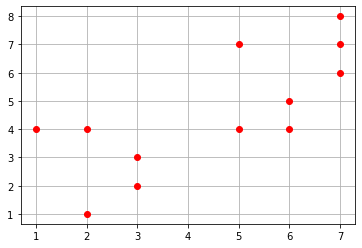

In [4]:
# 시각화
plt.plot(x,y, 'ro')
plt.grid()

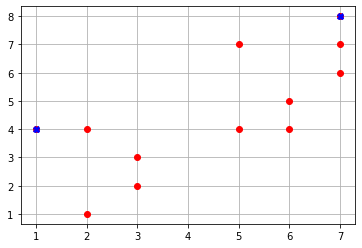

In [5]:
# 임의의 센터로이드 설정
# -> C1(1,4), C2(7,8)
plt.plot(x,y, 'ro')
plt.plot([1,7],[4,8],'bX')
plt.grid()

In [6]:
# 센터로이드와 각 점들간 거리 계산 : 유클리드 거리 계산
# 즉, A(X1, Y1)와 B(X2, Y2)간의 거리계산은
# sqrt((X2-X1)^2 + (Y2-Y1)^2)로 함

In [7]:
# C(2,4)와 D(6,4)는 A,B 중 어디와 가까운가?
math.sqrt((1-2)**2 + (4-4)**2) # A ~ C : 1
math.sqrt((1-6)**2 + (4-4)**2) # A ~ D : 5
# => C1로 분류

5.0

In [8]:
math.sqrt((7-2)**2 + (8-4)**2) # B ~ C : 6.4
math.sqrt((7-6)**2 + (8-4)**2) # B ~ D : 4.1
# => C2로 분류

4.123105625617661

### 새로운 중심점 설정
* 모든 데이터에 대한 군집화가 수행된 후 새로운 중심점을 선정한 후 다시 유사도에 의한 군집 실시
* 새로운 중심점을 선정하는 방법은 각 군집별 평균값을 이용
* 즉, 군집 C1, C2의 각 x/y 좌표간 평균계산
    + C1의 새로운 좌표
        - x좌표 : 1,2,2,3,3 / 5 = 2.2
        - y좌표 : 1,2,3,4,5 / 5 = 2.8
    + C2의 새로운 좌표
        - x좌표 : 5,5,6,6,7,7,7 / 7 = 6.14
        - y좌표 : 4,4,5,6,7,7,8 / 7 = 5.85
        - (7,8) -> (6.14, 5.85)

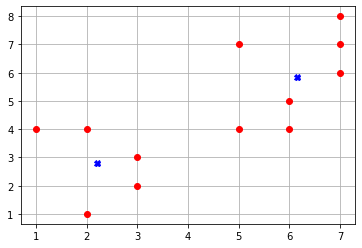

In [9]:
# 새로운 좌표 시각화
plt.plot(x,y, 'ro')
plt.plot([2.2,6.14],[2.8,5.85], 'bX')
plt.grid()

### iris 데이터셋을 Kmeans로 군집화하기

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# 데이터 적재 및 분할
iris = load_iris()

In [12]:
Xtrain, Xtest, ytrain, ytest =train_test_split(iris.data, iris.target, stratify=iris.target,random_state=2111151155)

In [13]:
# 군집분석 실시
# n_clusters : 군집수
# max_iter : 군집화 시도횟수
kms = KMeans(n_clusters=3, max_iter=100)
kms.fit(Xtrain)

KMeans(max_iter=100, n_clusters=3)

In [14]:
# 군집 결과 평가 : 객체명.labels_에 저장되어 있음
kms.labels_

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2,
       2, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2,
       0, 0], dtype=int32)

In [15]:
accuracy_score(kms.labels_, ytrain)

0.08035714285714286

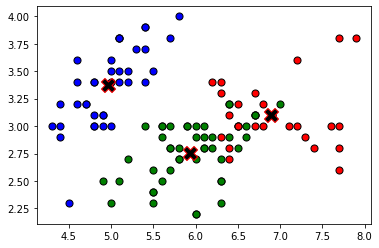

In [16]:
# 군집 시각화1 
plt.scatter(Xtrain[kms.labels_ == 0,0], Xtrain[kms.labels_ == 0,1], s=50,marker='o', c='r', edgecolors='k')

plt.scatter(Xtrain[kms.labels_ == 1,0], Xtrain[kms.labels_ == 1,1], s=50,marker='o', c='b', edgecolors='k')

plt.scatter(Xtrain[kms.labels_ == 2,0], Xtrain[kms.labels_ == 2,1], s=50,marker='o', c='g', edgecolors='k')
# 군집 중심점은 객체명.cluster_centers_에 저장되어 있음
plt.scatter(kms.cluster_centers_[0:,0], kms.cluster_centers_[0:,1] , s=200,marker='X', c='k', edgecolors='r')

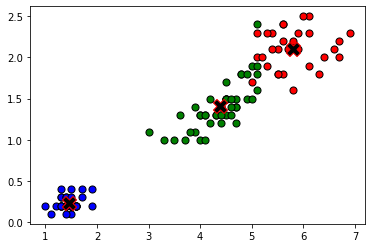

In [17]:
# 군집 시각화1 
plt.scatter(Xtrain[kms.labels_ == 0,2], Xtrain[kms.labels_ == 0,3], s=50,marker='o', c='r', edgecolors='k')

plt.scatter(Xtrain[kms.labels_ == 1,2], Xtrain[kms.labels_ == 1,3], s=50,marker='o', c='b', edgecolors='k')

plt.scatter(Xtrain[kms.labels_ == 2,2], Xtrain[kms.labels_ == 2,3], s=50,marker='o', c='g', edgecolors='k')
# 군집 중심점은 객체명.cluster_centers_에 저장되어 있음
plt.scatter(kms.cluster_centers_[:,2], kms.cluster_centers_[:,3] , s=200,marker='X', c='k', edgecolors='r')

In [20]:
# 군집 분석
kms.fit(Xtest)
accuracy_score(kms.labels_, ytest)

0.47368421052631576

In [21]:
# 군집 성능 평가
# 실루엣계수 : 군집 적합도를 수치로 나타낸 것
# 1에 가까울 수록 군집이 잘된것으로 파악 
silhouette_score(Xtrain, kms.labels_, metric='euclidean')

ValueError: Found input variables with inconsistent numbers of samples: [112, 38]

In [ ]:
# 엘보우 계수 : 군집화가 된 후 각 중심점에서 군집 데이터간의 거리를 합산한 값
# 군집이 어느정도로 잘되어 있는지를 나타내는 값
# 이값이 작을 수록 군집의 응집이 높다는 의미
# 객체명.inertia_

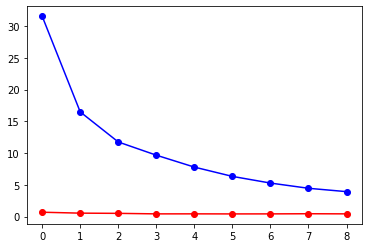

In [22]:
# 반복문을 통해 적저한 군집갯수와 그에 따른 실루엣 계수 확인
sss = []
els = []
for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtest)
    ss = silhouette_score(Xtest, kms.labels_, metric='euclidean')
    els.append(kms.inertia_)
    sss.append(ss)
plt.plot(sss,'ro-') # 실루엣계수만으로는 적절한 군집의 수를 파악하기 어려움

plt.plot(els,'bo-') # 엘보우 계수로 적절한 군집의 수를 파악하기에 다소 쉬운편 
                    # 즉, 엘보우 계수값이 급변하는 구간의 k값이 적절한 군집수로 인식함

In [ ]:
# 학생성적과 집중도를 기준으로
# 클래스를 나눌려고 할 때
# 몇 개의 반으로 나누는 것이 좋을지 알아보세요

In [34]:
academy = pd.read_csv('data/academy.csv', encoding='cp949')
ac = academy

In [35]:
data = ac.iloc[:, 1:]

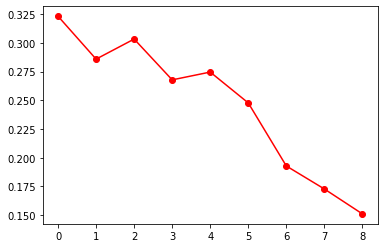

In [42]:
sss = []
els = []
for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(data)
    ss = silhouette_score(ac, kms.labels_, metric='euclidean')
    els.append(kms.inertia_)
    sss.append(ss)
plt.plot(sss, 'ro-')

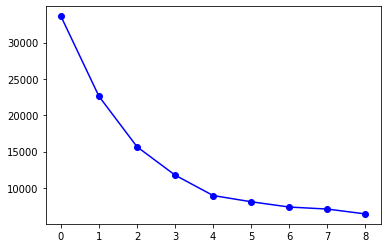

In [39]:
plt.plot(els, 'bo-')

In [52]:
kms = KMeans(n_clusters=3, max_iter=100, random_state=2111151440)
kms.fit(data)

KMeans(max_iter=100, n_clusters=3, random_state=2111151440)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  import sys


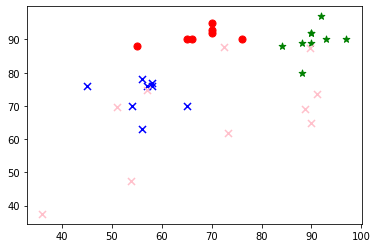

In [44]:
plt.scatter(data.iloc[kms.labels_ == 0,0], data.iloc[kms.labels_ == 0,1], s=50, marker='o', c='red')

plt.scatter(data.iloc[kms.labels_ == 1,0], data.iloc[kms.labels_ == 1,1], s=50, marker='x', c='blue')

plt.scatter(data.iloc[kms.labels_ == 2,0], data.iloc[kms.labels_ == 2,1], s=50, marker='*', c='green')

plt.scatter(kms.cluster_centers_[:,1], kms.cluster_centers_[:,2] , s=50, marker='x', c='pink', edgecolors='k')

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  import sys


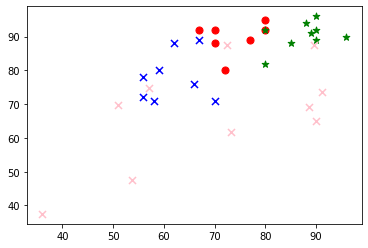

In [45]:
plt.scatter(data.iloc[kms.labels_ == 0,2], data.iloc[kms.labels_ == 0,3], s=50, marker='o', c='red')

plt.scatter(data.iloc[kms.labels_ == 1,2], data.iloc[kms.labels_ == 1,3], s=50, marker='x', c='blue')

plt.scatter(data.iloc[kms.labels_ == 2,2], data.iloc[kms.labels_ == 2,3], s=50, marker='*', c='green')

plt.scatter(kms.cluster_centers_[:,1], kms.cluster_centers_[:,2] , s=50, marker='x', c='pink', edgecolors='k')

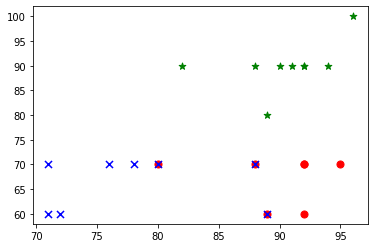

In [49]:
plt.scatter(data.iloc[kms.labels_ == 0,3], data.iloc[kms.labels_ == 0,4], s=50, marker='o', c='red')

plt.scatter(data.iloc[kms.labels_ == 1,3], data.iloc[kms.labels_ == 1,4], s=50, marker='x', c='blue')

plt.scatter(data.iloc[kms.labels_ == 2,3], data.iloc[kms.labels_ == 2,4], s=50, marker='*', c='green')

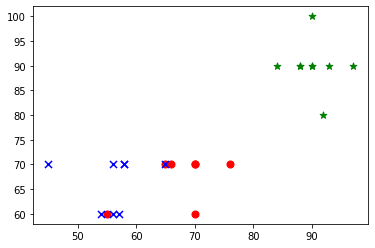

In [48]:
plt.scatter(data.iloc[kms.labels_ == 0,0], data.iloc[kms.labels_ == 0,4], s=50, marker='o', c='red')

plt.scatter(data.iloc[kms.labels_ == 1,0], data.iloc[kms.labels_ == 1,4], s=50, marker='x', c='blue')

plt.scatter(data.iloc[kms.labels_ == 2,0], data.iloc[kms.labels_ == 2,4], s=50, marker='*', c='green')

In [53]:
kms = KMeans(n_clusters=4, max_iter=100, random_state=2111151440)
kms.fit(data)

KMeans(max_iter=100, n_clusters=4, random_state=2111151440)

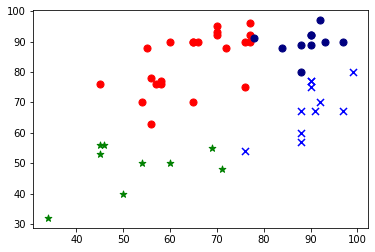

In [57]:
plt.scatter(data.iloc[kms.labels_ == 0,0], data.iloc[kms.labels_ == 0,1], s=50, marker='o', c='red')

plt.scatter(data.iloc[kms.labels_ == 1,0], data.iloc[kms.labels_ == 1,1], s=50, marker='x', c='blue')

plt.scatter(data.iloc[kms.labels_ == 2,0], data.iloc[kms.labels_ == 2,1], s=50, marker='*', c='green')

plt.scatter(data.iloc[kms.labels_ == 3,0], data.iloc[kms.labels_ == 3,1], s=50, marker='.', c='navy')

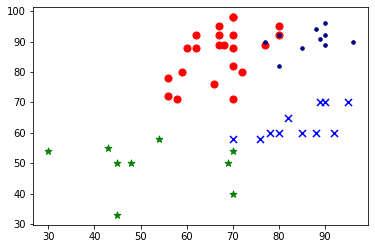

In [59]:
plt.scatter(data.iloc[kms.labels_ == 0,2], data.iloc[kms.labels_ == 0,3], s=50, marker='o', c='red')

plt.scatter(data.iloc[kms.labels_ == 1,2], data.iloc[kms.labels_ == 1,3], s=50, marker='x', c='blue')

plt.scatter(data.iloc[kms.labels_ == 2,2], data.iloc[kms.labels_ == 2,3], s=50, marker='*', c='green')

plt.scatter(data.iloc[kms.labels_ == 3,2], data.iloc[kms.labels_ == 3,3], s=50, marker='.', c='navy')

## 결론 : 4개로 나누는것이 적절해 보임